# Description

TODO

# Modules loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [5]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [6]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [7]:
time_results.shape

(8440, 4)

In [8]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000224,-0.115117
1,100,p-1,0.000099,-0.050567
2,100,p-1,0.000090,0.215785
3,100,p-1,0.000087,0.020045
4,100,p-1,0.000131,0.053343


In [9]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic-1', 'p-3', 's-3', 'cm-3', 'mic-3'],
      dtype=object)

# Processing

In [10]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
        }
    }
)

In [11]:
time_results.shape

(8440, 4)

In [12]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000224,-0.115117
1,100,Pearson (1 core),0.000099,-0.050567
2,100,Pearson (1 core),0.000090,0.215785
3,100,Pearson (1 core),0.000087,0.020045
4,100,Pearson (1 core),0.000131,0.053343


# Run numbers

In [13]:
plot_data = time_results  # [time_results["data_size"] >= 500]

In [14]:
run_numbers = plot_data.groupby(["data_size", "method"])["time"].describe()
display(run_numbers)

count       mean       std        min  \
data_size method                                                       
100       CCC (1 core)        1000.0   0.003682  0.000218   0.003000   
          CCC (3 cores)       1000.0   0.002889  0.000355   0.002627   
          MIC (1 core)        1000.0   0.003202  0.000145   0.002826   
          MIC (3 cores)       1000.0   0.003217  0.000139   0.002839   
          Pearson (1 core)    1000.0   0.000077  0.000008   0.000073   
          Pearson (3 cores)   1000.0   0.000075  0.000009   0.000072   
          Spearman (1 core)   1000.0   0.000514  0.000233   0.000492   
          Spearman (3 cores)  1000.0   0.000506  0.000024   0.000492   
500       CCC (1 core)          10.0   0.007030  0.000167   0.006799   
          CCC (3 cores)         10.0   0.004333  0.000601   0.003629   
          MIC (1 core)          10.0   0.047231  0.000604   0.046002   
          MIC (3 cores)         10.0   0.047760  0.000945   0.045975   
          Pearson (1 core)      10.0   0.000084  0.000012   0.000079   
          Pearson (3 cores)     10.0   0.000083  0.000016   0.000076   
          Spearman (1 core)     10.0   0.000612  0.000034   0.000591   
          Spearman (3 cores)    10.0   0.000598  0.000029   0.000583   
1000      CCC (1 core)          10.0   0.012405  0.000245   0.011982   
          CCC (3 cores)         10.0   0.006082  0.000393   0.005641   
          MIC (1 core)          10.0   0.141399  0.001922   0.138580   
          MIC (3 cores)         10.0   0.142042  0.001968   0.139816   
          Pearson (1 core)      10.0   0.000089  0.000012   0.000083   
          Pearson (3 cores)     10.0   0.000087  0.000013   0.000081   
          Spearman (1 core)     10.0   0.000684  0.000028   0.000667   
          Spearman (3 cores)    10.0   0.000680  0.000028   0.000664   
5000      CCC (1 core)          10.0   0.051438  0.000752   0.050590   
          CCC (3 cores)         10.0   0.021173  0.000564   0.020683   
          MIC (1 core)          10.0   1.642672  0.004757   1.635538   
          MIC (3 cores)         10.0   1.663788  0.005535   1.656867   
          Pearson (1 core)      10.0   0.000112  0.000013   0.000107   
          Pearson (3 cores)     10.0   0.000109  0.000009   0.000105   
          Spearman (1 core)     10.0   0.001318  0.000040   0.001283   
          Spearman (3 cores)    10.0   0.001319  0.000030   0.001283   
10000     CCC (1 core)          10.0   0.102987  0.001128   0.101346   
          CCC (3 cores)         10.0   0.040957  0.000513   0.040298   
          MIC (1 core)          10.0   6.314721  0.019199   6.294895   
          MIC (3 cores)         10.0   6.323273  0.012966   6.299281   
          Pearson (1 core)      10.0   0.000137  0.000011   0.000132   
          Pearson (3 cores)     10.0   0.000139  0.000012   0.000133   
          Spearman (1 core)     10.0   0.002249  0.000044   0.002214   
          Spearman (3 cores)    10.0   0.002243  0.000037   0.002211   
100000    CCC (1 core)          10.0   1.128666  0.011489   1.116345   
          CCC (3 cores)         10.0   0.443672  0.005100   0.439134   
          Pearson (1 core)      10.0   0.002849  0.003499   0.001438   
          Pearson (3 cores)     10.0   0.001473  0.000350   0.001016   
          Spearman (1 core)     10.0   0.026674  0.000415   0.026268   
          Spearman (3 cores)    10.0   0.027076  0.000677   0.026350   
1000000   CCC (1 core)          10.0  13.898166  0.080063  13.850638   
          CCC (3 cores)         10.0   6.316510  0.032474   6.260043   
          Pearson (1 core)      10.0   0.013941  0.000957   0.013055   
          Pearson (3 cores)     10.0   0.013042  0.000807   0.012566   
          Spearman (1 core)     10.0   0.377482  0.003798   0.372549   
          Spearman (3 cores)    10.0   0.377317  0.003872   0.372952   

                                    25%        50%        75%        max  
data_size method                                                   

# Plot

In [15]:
hue_order = None  # ["CCC", "MIC", "Pearson", "Spearman"]

In [16]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [17]:
# colors = {
#     "CCC": deep_colors[0],
#     "Pearson": deep_colors[1],
#     "Spearman": deep_colors[2],
# }

In [18]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

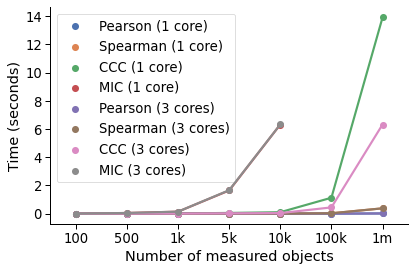

In [19]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    # plt.savefig(
    #     OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
    #     bbox_inches="tight",
    #     facecolor="white",
    # )
    # ax.set_yscale('log')

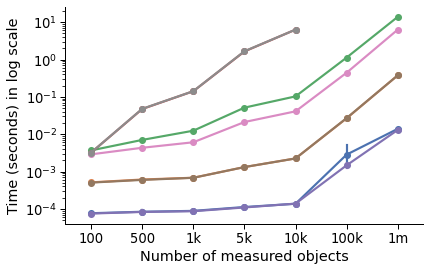

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend([], [], frameon=False)
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    plt.tight_layout()
    # plt.savefig(
    #     OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
    #     bbox_inches="tight",
    #     facecolor="white",
    # )
    ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [21]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
        }
    }
)

In [22]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MIC (1 core)', 'Pearson', 'Spearman', 'CCC (3 cores)', 'MIC'],
      dtype=object)

In [23]:
hue_order = ["MIC", "CCC (1 core)", "CCC (3 cores)", "Spearman", "Pearson"]

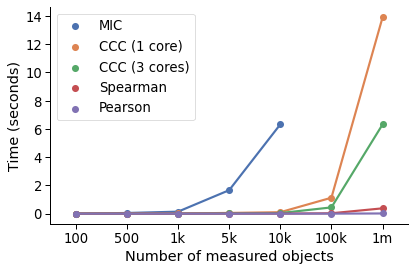

In [24]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

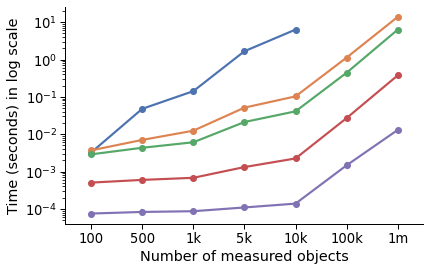

In [25]:
with sns.plotting_context("paper", font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        legend=False,
    )
    sns.despine()
    plt.legend([], [], frameon=False)
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    plt.tight_layout()
    ax.set_yscale("log")
    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [26]:
from svgutils.compose import Figure, SVG, Panel, Text

In [27]:
Figure(
    "434.7513cm",
    "135.00382cm",
    SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.5),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.5).move(220, 0),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

Now open the file, reside to fit drawing to page, and add a white rectangle to the background.

I think it's important to open the file with Inkscape and save it, just to make sure the content is right.
Because sometimes Inkscape crashed when opening it.